In [1]:
%pylab inline

import pyvips
from pathlib import Path
import pandas as pd
from glob import glob
import imageio

Populating the interactive namespace from numpy and matplotlib


In [12]:
cd /home/gus/Documents/PhD/PhD_Projects/Part3_MFT_Application/3.4_MFT-external/3.4.9_Inktime_Frank/inktime/data/Processed/Photos

/home/gus/Documents/PhD/PhD_Projects/Part3_MFT_Application/3.4_MFT-external/3.4.9_Inktime_Frank/inktime/data/Processed/Photos


# RGB to other colorspaces 

In [21]:
# selet the desired files
files = glob('*corr*CAL10.TIF*')

# upload the file in pyvips
im = pyvips.Image.new_from_file(files[0])

# upload the file with imageio and numpy, it is easier to display the image
np_im = np.array(imageio.imread(files[0]))

# print some info about the image
print(f'original image: {im.bands} bands, {im.interpretation}')

# convert from RGB to Lab colorspace
lab_im = im.icc_import(embedded=True)         # embedded is True because the image already has an icc colour profile embedded
print(f'lab image: {lab_im.bands} bands, {lab_im.interpretation}') 

# change to another colorspace
xyz_im = lab_im.colourspace('xyz')  # here are other possible colorspaces: xyz, lab, cmyk, labq, rgb, cmc, lch, labs, srgb, yxy, fourier, rgb16, grey16, matrix, scrgb, hsv
print(f'xyz image: {xyz_im.bands} bands, {xyz_im.interpretation}') 

original image: 3 bands, rgb16
lab image: 3 bands, lab
xyz image: 3 bands, xyz


# Display the image and some Lab values 

rgb16 at x=500 y=1800 is [51166.0, 51646.0, 50502.0]
lab at x=500 y=1800 is [78.75153350830078, -1.1015625, 2.63671875]
xyz at x=500 y=1800 is [51.38121032714844, 54.49852752685547, 56.51236343383789]
--------------------------------------------
rgb16 at x=1000 y=1800 is [60071.0, 60241.0, 62240.0]
lab at x=1000 y=1800 is [92.44332122802734, 0.95703125, -4.078125]
xyz at x=1000 y=1800 is [78.13358306884766, 81.70233154296875, 94.90863037109375]
--------------------------------------------
rgb16 at x=1500 y=1800 is [16855.0, 38910.0, 49899.0]
lab at x=1500 y=1800 is [54.13602828979492, -33.76953125, -35.953125]
xyz at x=1500 y=1800 is [14.7251558303833, 22.102914810180664, 52.54716873168945]
--------------------------------------------
rgb16 at x=1750 y=1800 is [39605.0, 0.0, 44665.0]
lab at x=1750 y=1800 is [41.583946228027344, 66.87109375, -41.6640625]
xyz at x=1750 y=1800 is [23.78382110595703, 12.232924461364746, 38.10955810546875]
--------------------------------------------
rgb16 

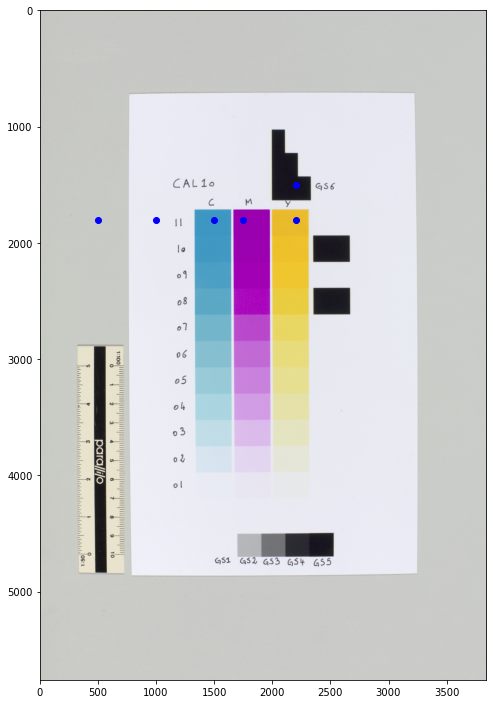

In [47]:
# define a number of points on the image for which the Lab values will be given
pts = [[500, 1800], [1000, 1800], [1500, 1800], [1750, 1800], [2200, 1800], [2200,1500]]          # NOTE!:  these are x, y, NOT row, column

figure(figsize=(8, 16))
imshow(np_im/(255*255))  # I divide the image by 255*255 because imshow only takes values between 0 and 1. Since this is a 16bit image, divide the values by 255*255 will scale them from 0 to 1.

for (col, row) in pts:
    plot([col], [row], 'bo')
    
for x, y in pts:
    print(f'rgb16 at {x=} {y=} is {im.getpoint(x, y)}')
    print(f'lab at {x=} {y=} is {lab_im.getpoint(x, y)}')    
    print(f'xyz at {x=} {y=} is {xyz_im.getpoint(x, y)}')
    print('--------------------------------------------')
    
    
# I am puzzle by the xyz values, I was expected values between 0 and 1

In [62]:
!exiftool corr_2022-03-23_unaged_CAL10.TIF

ExifTool Version Number         : 10.80
File Name                       : corr_2022-03-23_unaged_CAL10.TIF
Directory                       : .
File Size                       : 127 MB
File Modification Date/Time     : 2022:03:24 21:11:47+01:00
File Access Date/Time           : 2022:03:24 21:11:57+01:00
File Inode Change Date/Time     : 2022:03:24 21:11:47+01:00
File Permissions                : rw-rw-r--
File Type                       : TIFF
File Type Extension             : tif
MIME Type                       : image/tiff
Exif Byte Order                 : Little-endian (Intel, II)
Image Width                     : 3840
Image Height                    : 5760
Bits Per Sample                 : 16 16 16
Compression                     : Uncompressed
Photometric Interpretation      : RGB
Strip Offsets                   : (Binary data 405 bytes, use -b option to extract)
Orientation                     : Horizontal (normal)
Samples Per Pixel               : 3
Rows Per Strip                

In [69]:
!exiftool -MediaWhitePoint corr_2022-03-23_unaged_CAL10.TIF

Media White Point               : 0.9642 1 0.82491


The media white point display the normalized XYZ coordinates of the white point ; normalized because Y = 1

The eciRGB v2 is based on an D50 illuminant